## [Convert Infix expression to Postfix expression](https://www.geeksforgeeks.org/convert-infix-expression-to-postfix-expression/)

#### Write a program to convert an Infix expression to Postfix form.

`Infix expression: The expression of the form “a operator b” (a + b) i.e., when an operator is in-between every pair of operands.`

`Postfix expression: The expression of the form “a b operator” (ab+) i.e., When every pair of operands is followed by an operator.`

- Example 1:
    - Input: A + B * C + D
    - Output: ABC*+D+
- Example 2:
    - Input: ((A + B) – C * (D / E)) + F
    - Output: AB+CDE/*-F+  

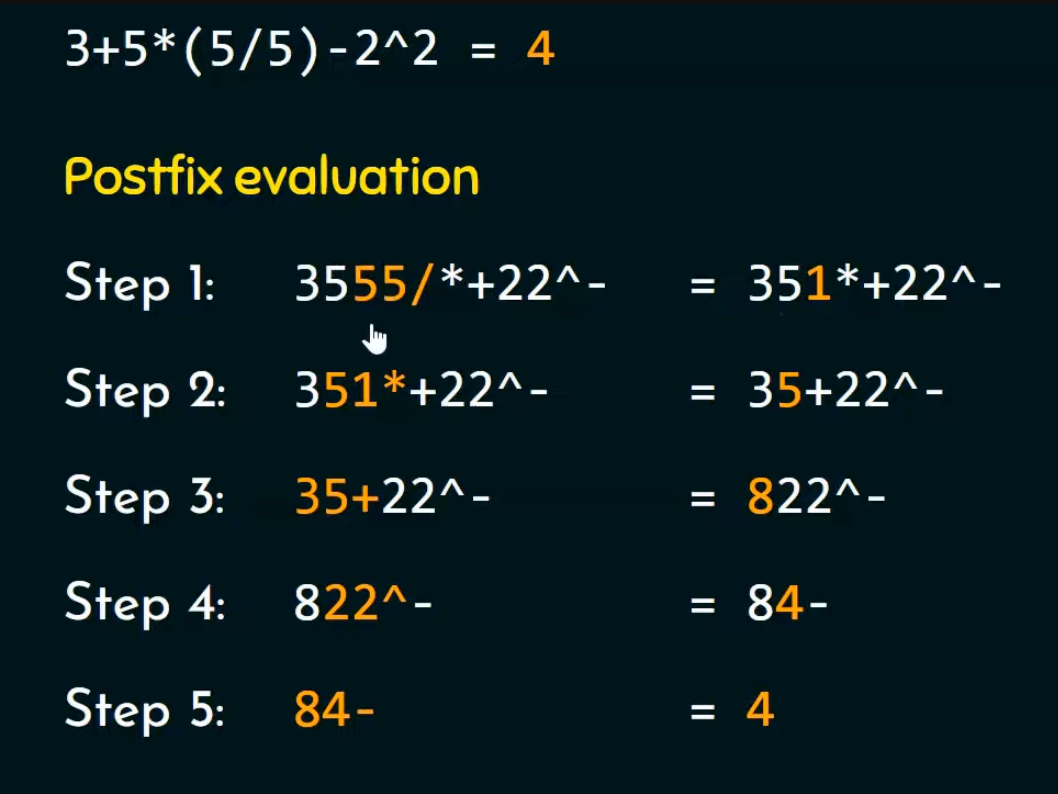

**Priority of Operands**
- 1 : Parentheses ()
- 2 : Exponentiation (^) # consider `right-to-left` when there are multiple
- 3 : Multiplication & Division & Percentile (* & / & %) # consider `left-to-right` processing as both have same priority
- 4 : Addition & Subtraction (+ & -) # consider `left-to-right` processing as both have same priority

**Example:** `A + B / C * D - E / (F + G)`
- Order of Execution
    - 1 : (F + G)
    - 2 : B / C     # b'coz left to right rule as same operators
    - 3 : 2 * D
    - 4 : E / 1
    - 5 : A + 3
    - 6 : 5 - 4

**Part 1:** [https://www.youtube.com/watch?v=XfX5jlzWQsg](https://www.youtube.com/watch?v=XfX5jlzWQsg)

**Part 2:** [https://www.youtube.com/watch?v=IQ3p9yCLYuQ](https://www.youtube.com/watch?v=IQ3p9yCLYuQ)

**Part 3:** [https://www.youtube.com/watch?v=aq8S_RJN7bE](https://www.youtube.com/watch?v=aq8S_RJN7bE)

**Infix:** `A + B / C * D - E / (F + G)`

**Postfix:** `ABC/D*+EFG+/-` # No parentheses are required

**Golden rule of thumb:** 

`The expression will be scanned from left to right and as soon as we will encounter an operator, we will apply it to the last two operands.`

**To Better Understand, Watch:** [https://www.youtube.com/watch?v=PAceaOSnxQs](https://www.youtube.com/watch?v=PAceaOSnxQs)

**Method #1:**
- Time Complexity: `O(n)`
- Space Complexity: `O(n)`

In [ ]:
Operators = set(['+', '-', '*', '/', '%', '**', '(', ')'])  # collection of Operators (** = ^)
Priority = {'+':1, '-':1, '*':2, '/':2, '%':2, '**':3} # dictionary having priorities of Operators

def infixToPostfix(expression): 
    if not expression:
        return ""

    stack = [] # initialization of empty stack
    output = ''     

    for character in expression:
        if character not in Operators:  # if char is a digit/alphabet
            output += character
        elif character == '(':  # else Operators push onto stack
            stack.append('(')
        elif character == ')':
            while stack and stack[-1] != '(':   # if precedece of incoming operator is > than top of stack, pop the stack n continue this until the precedence condition is honored
                output += stack.pop()
            if not stack or stack[-1] != '(':
                raise ValueError("Unbalanced parentheses in expression")
            stack.pop()                         # i think for removing the '('                  # REMEMBER
        else: 
            while stack and stack[-1] != '(' and Priority[character] <= Priority[stack[-1]]:    # REMEMBER '<='
                output += stack.pop()
            stack.append(character)                                                             # REMEMBER
    while stack:
        if stack[-1] == '(':
            raise ValueError("Unbalanced parentheses in expression")
        output += stack.pop()
    return output

In [8]:
expression = "m*n+(p-q)+r"

In [9]:
print('postfix notation: ', infixToPostfix(expression))

postfix notation:  mn*pq-+r+
